# Podobieństwo

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
hic = np.load("hic_100.npy")

In [3]:
hic.shape

(150, 150)

<AxesSubplot:>

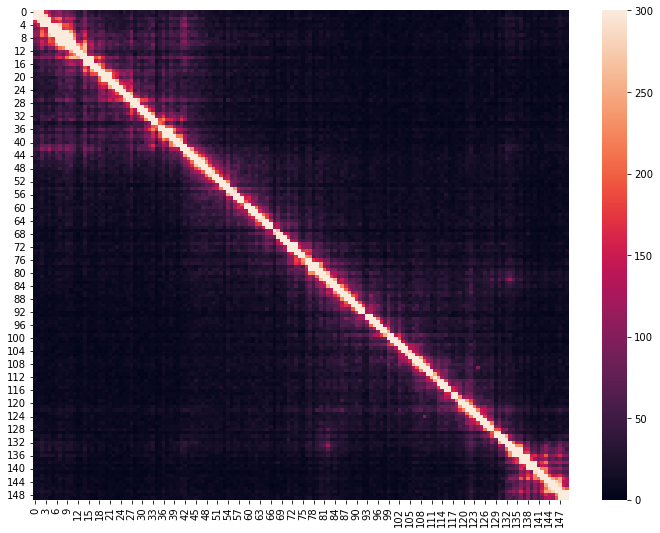

In [4]:
import matplotlib.pyplot as plt

# Tworzenie nowej figury z zadanymi wymiarami
fig = plt.figure(figsize=(12, 9))
sns.heatmap(hic, vmax=300)

In [6]:
dfE = pd.read_csv("d10_E.csv")
dfV = pd.read_csv("d10_V.csv")

In [7]:
len(dfV)

2488

In [8]:
import pandas as pd
import networkx as nx
import random

# Tworzenie grafu G na podstawie danych w DataFrame dfE
G = nx.Graph()

# Dodanie wierzchołków do grafu
for _, row in dfV.iterrows():
    G.add_node(row["id"], x=row["x"], y=row["y"], z=row["z"])

# Dodanie krawędzi do grafu
for _, row in dfE.iterrows():
    G.add_edge(int(row["id1"]), int(row["id2"]), weight=row["weight"])

# Wyświetlenie informacji o grafie
struktura = dfV['id'].tolist()

In [9]:
len(struktura)

2488

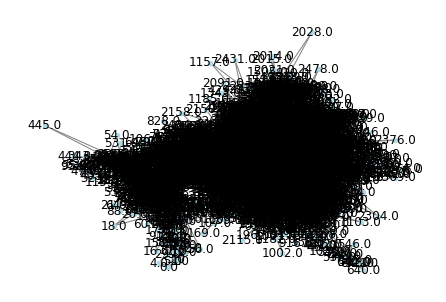

In [8]:
nx.draw(G, with_labels=True, node_color='lightblue', node_size=20, edge_color='gray')
# Wyświetlanie grafu
plt.show()

In [10]:
def generuj_struktura(G):
    # Wylosuj losowy wierzchołek początkowy
    start_node = random.choice(list(G.nodes()))
    
    # Zainicjuj ścieżkę
    path = [start_node]
    
    # Dopóki nie osiągnięto wszystkich wierzchołków w grafie, dodawaj kolejne wierzchołki do ścieżki
    # CZEMU MAMY OSIĄGAĆ WSZYSTKIE WIERZCHOŁKI? 
    while len(path) < 10:  #while len(path) < len(G.nodes()):
        # Wybierz losowego sąsiada ostatniego wierzchołka w ścieżce
        current_node = path[-1]
        neighbors = list(G.neighbors(current_node))
        random.shuffle(neighbors)
        
        # Dodaj do ścieżki pierwszego sąsiada, który nie tworzy cyklu
        for neighbor in neighbors:
            if neighbor not in path:
                path.append(neighbor)
                break
        
        # Jeśli nie udało się dodać żadnego nowego wierzchołka, to wylosuj losowy wierzchołek, który nie jest jeszcze w ścieżce
        if path[-1] == current_node:
            unused_nodes = set(G.nodes()) - set(path)
            random_node = random.choice(list(unused_nodes))
            path.append(random_node)
            
    return path

In [11]:
struktura=generuj_struktura(G)
struktura

[2156.0, 2025, 2031, 2037, 2165, 2171, 2164, 2161, 2155, 2017]

In [12]:
def proponuj_g(struktura, G):
    """
    Funkcja proponująca nową strukturę.
    Struktura to lista zawierająca identyfikatory wierzchołków w kolejności, w której są połączone, ścieżka
    G - graf
    """
    # Wybieramy wierzchołek ostatni w ścieżce
    v = struktura[-1]
    # Sprawdzamy połączone z nim wierzchołki, które nie są w strukturze
    nie_odwiedzone = [u for u in G.neighbors(v) if u not in struktura]
    nowa_struktura=struktura
    # jeśli takie nie istnieją to koniec? Nie pójdziemy dalej?
    if len(nie_odwiedzone) != 0:
        # Szukamy najbliższego nieodwiedzonego
        min_distance = float("inf")
        nowy=0
        for u in nie_odwiedzone:
            distance = (G.nodes[v]['x']-G.nodes[u]['x'])**2+(G.nodes[v]['y']-G.nodes[u]['y'])**2+(G.nodes[v]['z']-G.nodes[u]['z'])**2
            if distance < min_distance:
                min_distance = distance
                nowy = u
        nowa_struktura = struktura + [nowy]
    else:
      #Czy jeśli natrafimy na ślepy zaułek to chcemy się cofnąć?
        nowa_struktura = struktura[:-1]


    return nowa_struktura

In [19]:
proponuj_g(struktura, G)

[2156.0, 2025, 2031, 2037, 2165, 2171, 2164, 2161, 2155, 2017, 1862]

# Funkcja F

In [20]:
# FUNKCJA PRZYJMU
def list_to_graph(lista, G):
    prev = None
    
    graph_from_list = nx.Graph()
    G_nodes_info = []
    G_nodes_info = list(G.nodes(data=True))
    
    for elem in lista:
        node_id = G_nodes_info[int(elem)][0]
        x = G_nodes_info[int(elem)][1]['x']
        y = G_nodes_info[int(elem)][1]['y']
        z = G_nodes_info[int(elem)][1]['z']
        graph_from_list.add_node(node_id, x=x, y=y, z=z)
        
        if(prev is not None):
            prev_id = G_nodes_info[int(prev)][0]
            graph_from_list.add_edge(int(prev_id), int(node_id), weight = 1)
        
        prev = elem
    return graph_from_list

#Generowanie grafu
graph = list_to_graph(struktura, G)

In [21]:
struktura2 = generuj_struktura(G)
for i in range(2488):
    struktura2=proponuj_g(struktura2, G)
struktura2

[209.0,
 295,
 217,
 303,
 304,
 400,
 314,
 231,
 323,
 418,
 516,
 601,
 517,
 419,
 410,
 508,
 585,
 594,
 584,
 507,
 593,
 583,
 506,
 592,
 582,
 505,
 407,
 396,
 494,
 581,
 504,
 406,
 395,
 493,
 571,
 483,
 386,
 380,
 478,
 566,
 477,
 379,
 384,
 481,
 568,
 490,
 577,
 578,
 501,
 403,
 392,
 402]

# Tutaj mamy sprawdzić odległości. Czyli kolejno:
## 1. Posiadać graf początkowy przez nas stworzony
## 2. Wyciągnąć z niego listę współrzędnych
## 3. Zmienić wymiary liniowo
## 4. Stworzyć nowy graf z nowo wymiarowych punktów
## 5. Stworzyć mapę odległości Hi-C na podstawie nowego grafu

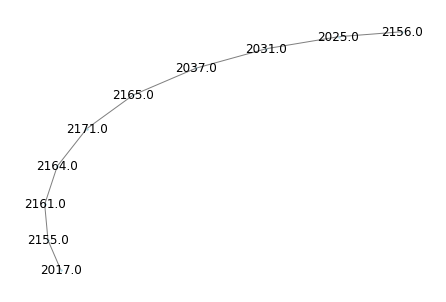

In [22]:
#1 nasz graf początkowy
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=2, edge_color='gray')
# Wyświetlanie grafu
plt.show()

In [23]:
#2 jego współrzędne
list(graph.nodes(data=True))

[(2156.0, {'x': 340.0, 'y': 334.86315612998294, 'z': 653.1972647421808}),
 (2025.0, {'x': 340.0, 'y': 357.957166897568, 'z': 620.5374015050718}),
 (2031.0, {'x': 320.0, 'y': 392.5981830489455, 'z': 620.5374015050718}),
 (2037.0, {'x': 340.0, 'y': 427.239199200323, 'z': 620.5374015050718}),
 (2165.0, {'x': 340.0, 'y': 404.145188432738, 'z': 653.1972647421808}),
 (2171.0, {'x': 320.0, 'y': 438.7862045841155, 'z': 653.1972647421808}),
 (2164.0, {'x': 300.0, 'y': 404.145188432738, 'z': 653.1972647421808}),
 (2161.0, {'x': 320.0, 'y': 369.50417228136047, 'z': 653.1972647421808}),
 (2155.0, {'x': 300.0, 'y': 334.86315612998294, 'z': 653.1972647421808}),
 (2017.0, {'x': 320.0, 'y': 323.31615074619043, 'z': 620.5374015050718})]

## Wyciągamy współrzędne punktów

In [24]:
def zapisz_jako_liste_wspolrzednych(graph):

    lista_wspolrzednych = []

    for wierzcholek, atrybuty in graph.nodes(data=True):
        wspolrzedne = [atrybuty['x'], atrybuty['y'], atrybuty['z']]
        lista_wspolrzednych.append(wspolrzedne)

    return lista_wspolrzednych

punkty = zapisz_jako_liste_wspolrzednych(graph)
punkty

[[340.0, 334.86315612998294, 653.1972647421808],
 [340.0, 357.957166897568, 620.5374015050718],
 [320.0, 392.5981830489455, 620.5374015050718],
 [340.0, 427.239199200323, 620.5374015050718],
 [340.0, 404.145188432738, 653.1972647421808],
 [320.0, 438.7862045841155, 653.1972647421808],
 [300.0, 404.145188432738, 653.1972647421808],
 [320.0, 369.50417228136047, 653.1972647421808],
 [300.0, 334.86315612998294, 653.1972647421808],
 [320.0, 323.31615074619043, 620.5374015050718]]

## Liniowo przekształcamy wymiary

In [25]:
from scipy.interpolate import CubicSpline

def evenly_distribute_points(points, num_new_points):
    num_points = len(points)
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]
    
    t = range(num_points)
    t_interp = [i * (num_points - 1) / float(num_points + num_new_points - 1) for i in range(num_points + num_new_points)]
    
    interp_x = CubicSpline(t, x)(t_interp)
    interp_y = CubicSpline(t, y)(t_interp)
    interp_z = CubicSpline(t, z)(t_interp)
    
    new_points = [[interp_x[i], interp_y[i], interp_z[i]] for i in range(num_points + num_new_points)]
    
    return new_points

In [26]:
ile_nowych = 2488 - len(punkty)
nowe_punkty = evenly_distribute_points(punkty, ile_nowych)
len(nowe_punkty)

2488

In [28]:
nowe_punkty

[[340.0, 334.86315612998294, 653.1972647421808],
 [340.15171127739166, 334.94875924686426, 652.9490958406082],
 [340.3019027690292, 335.03426508640854, 652.7021279145398],
 [340.45057904344384, 335.11967455114046, 652.4563581554997],
 [340.5977446691666, 335.2049885435846, 652.211783755012],
 [340.7434042147287, 335.29020796626554, 651.9684019046003],
 [340.887562248661, 335.37533372170776, 651.7262097957888],
 [341.0302233394951, 335.46036671243604, 651.4852046201013],
 [341.1713920557616, 335.54530784097483, 651.2453835690617],
 [341.31107296599197, 335.63015800984874, 651.006743834194],
 [341.4492706387171, 335.71491812158234, 650.7692826070223],
 [341.5859896424683, 335.79958907870025, 650.5329970790705],
 [341.7212345457766, 335.8841717837271, 650.2978844418624],
 [341.85500991717305, 335.9686671391873, 650.0639418869218],
 [341.9873203251889, 336.0530760476056, 649.831166605773],
 [342.1181703383552, 336.1373994115066, 649.5995557899398],
 [342.24756452520296, 336.2216381334148, 

## Tworzymy mapę Hi-C ze współrzędnych

In [56]:
def create_hic_map(points):
distances = distance_matrix(points, points)
    min_value = np.min(distances)
    max_value = np.max(distances)
    inverted_distances = (max_value - distances) + min_value
    return inverted_distances

In [57]:
hic2 = create_hic_map(nowe_punkty)

## Zmieniamy wymiar macierzy

In [58]:
from scipy.ndimage import zoom

def reduce_hic_dimension(matrix, target_shape):
    original_shape = matrix.shape
    if original_shape[0] <= target_shape[0] or original_shape[1] <= target_shape[1]:
        raise ValueError("Target shape must be smaller than the original matrix shape")

    zoom_factor = (target_shape[0] / original_shape[0], target_shape[1] / original_shape[1])
    reduced_matrix = zoom(matrix, zoom_factor, order=1)

    return reduced_matrix

hic2 = reduce_hic_dimension(hic2, (150, 150))

In [59]:
hic2.shape

(150, 150)

<AxesSubplot:>

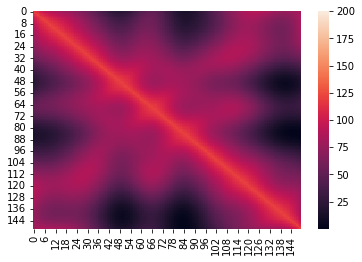

In [61]:
sns.heatmap(hic2, vmax=300)

## Porównanie odległości macierzy

In [63]:
import numpy as np
from scipy.stats import pearsonr

def porownaj_odleglosci(macierz_hic1, macierz_hic2):

    spłaszczona_hic1 = macierz_hic1.flatten()
    spłaszczona_hic2 = macierz_hic2.flatten()

    korelacja, _ = pearsonr(spłaszczona_hic1, spłaszczona_hic2)

    return korelacja


korelacja = porownaj_odleglosci(hic, hic2)

print("Korelacja Pearsona między macierzami Hi-C:", korelacja)

Korelacja Pearsona między macierzami Hi-C: 0.31463346002032366


# Finalna funkcja 'podobienstwo_f'

In [64]:
def podobienstwo_f(struktura, hic):
    graf = list_to_graph(struktura, G)
    punkty = zapisz_jako_liste_wspolrzednych(graf)
    ile_nowych = len(dfV) - len(punkty)
    nowe_punkty = evenly_distribute_points(punkty, ile_nowych)
    hic2 = create_hic_map(nowe_punkty)
    dimensions = hic.shape
    hic2 = reduce_hic_dimension(hic2, dimensions)

    korelacja = porownaj_odleglosci(hic, hic2)
    return f"Korelacja Pearsona wynosi: {korelacja}"

In [65]:
podobienstwo_f(struktura2, hic)

'Korelacja Pearsona wynosi: 0.294017953758114'